# Classification Avancée
## projet : Deep Learning

Au cas où, il nous faut d'abord installer les modules nécessaires et télécharger les données :

In [1]:
# Obligatoire :
#!pip3 install keras --user
!pip3 install tensorflow --user
# Sur votre machine (normalement déjà installé dans les salles machines)
#!pip3 install tensorflow-gpu
#!pip3 install tensorflow

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## De la documentation


### Deep Learning avec Keras
- Doc keras :https://keras.io/
- Le model Sequential (premier pas) : https://keras.io/getting-started/sequential-model-guide/#getting-started-with-the-keras-sequential-model
- Un framework plus riche : https://keras.io/getting-started/functional-api-guide/

### Autres Toolkits et packages

- Lasagne : Langage *de haut niveau* comme keras


NB : Lasagne et Keras utilisent indifférement un backend parmi Theano (Univ. Montreal) et Tensorflow (Google)

- Theano :  le package de l'Univ. de Montréal

- Tensorflow :  le package Google

- Caffe : très spécialisé images

- Pytorch : la plateforme de Facebook

- ...


## Récupération d'un dataset existant
On va travailler avec un jeux de données historique que vous conaissez déjà : MNIST. Ce sont des chiffres manuscrits, donc des images en niveaux de gris, en résolution 28x28

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

%matplotlib inline
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


dimension des données :  (60000, 28, 28) (60000,)
une données : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 121 255 165   0   0   0   0   0   0  70
  254 179   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 131 254 153   0   0   0   0   0   0 106
  254 249  50   0   0   0   0   0   0   0]

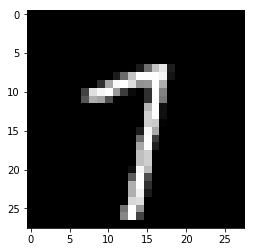

In [3]:
print("dimension des données : ", X_train.shape, y_train.shape)
print("une données : ")
print(X_test[42])

print("Une données sous format plus lisible :")
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.show()

### Prétraitement
Les données ne sont pas dans le format nécessaire à Keras : il vaut vectoriser chaque image. On va aussi les normaliser, pour n'avoir que des valeurs comprisent entre 0 et 1 (améliore la vitesse de convergence)

In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

import numpy as np
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print("Classe de la data num 42 :", y_train[42])

(60000, 784)
(10000, 784)
(60000,)
Classe de la data num 42 : 7


In [6]:
# On transforme les sorties (numéros de classe) en des vecteurs de type one-hot-code
nb_classes = 10

Y_train = y_train
Y_test = y_test
y_train =  np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


In [7]:
print(y_train.shape)
print("Classe de la data num 42 : ", y_train[42])

(60000, 10)
Classe de la data num 42 :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Apprendre un réseau de neurones pour la classification de MNIST
D'abord il faut créer le model.
On ajoute les couches une à une. Ici un modèle qui 
- prend en entrée un vecteur de dimension 784 (une image Mnist 28x28 vectorisée)
- transforme l'entrée en un vecteur de dimension 64 avec une couche totalement connectée (Dense), avec une fonction d'une activation de type Rectified Linear Unit 
- Transforme la sortie de la couche précédente (de dimension 64) en un vecteur de dimension 10 avec une autre couche dense 
- Transforme le vecteur de dimenbsion 10 en un autre vecteur de dimension 10 à l'aide d'une couche dense avec la fonction d'activation softmax

In [8]:
# Import from Keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential


In [9]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

Puis il faut "compiler" le modèle, en précisant :
- le critère d'optimisation : le *loss*
- la routine d'optimisation (ie l'utilisation du gradient) : l'*optimizer*
- les métriques additionnelles au *loss* (ici l'*accuracy*, le taux de bonne classification) que l'on va calculer à chaque fois

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['acc'])

### Affichage de la structure du modèle

Expliquee les différentes éléments de chacune des lignes affichées par la commande suivante.

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
_________________________________________________________________


Ou une manière plus graphique (nécessite l'installation de pydot et surtout graphviz, ce qui n'est pas forcément facile) :

In [11]:
!pip3 install pydot --user
#!pip3 install graphviz --user
#!sudo apt-get install graphviz

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


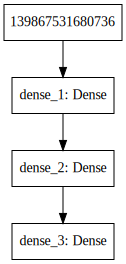

In [12]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

### On peut maintenant apprendre le modèle en précisant 
- la base d'apprentissage (les deux premiers paramètres)
- le nombre d'itérations d'apprentissage (*epochs*)
- la taille des minibatchs (*batch_size*)
- un ensemble de validation (soit on utilise comme ici un pourcentage des données d'entrée *X_train, y_train*, soit d'autres ensemble de données via *validation_data=(X_test, y_test)*)
- le niveau de verbosité de l'affichage


In [13]:
h = model.fit(X_train, y_train,
              epochs=3,
              batch_size=16,
              verbose =1,
              validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/3
40199/40199 [==============================] - 5s 133us/step - loss: 0.3560 - acc: 0.8952 - val_loss: 0.2160 - val_acc: 0.9354
Epoch 2/3
40199/40199 [==============================] - 6s 155us/step - loss: 0.1763 - acc: 0.9485 - val_loss: 0.1672 - val_acc: 0.9515
Epoch 3/3
40199/40199 [==============================] - 7s 186us/step - loss: 0.1336 - acc: 0.9611 - val_loss: 0.1495 - val_acc: 0.9575


### On peut alors évaluer le modèle sur l'ensemble de test

In [14]:
score = model.evaluate(X_test, y_test, verbose=2, batch_size=16)

print (score)

[0.13693056365009398, 0.9599]


### Les info sur le processus d'apprentissage sont stockées dans h
Comme on va en avoir besoin plusieurs fois, on écrit une fonction qui prend un historique d'apprentissage et affiche les courbes : une pour la fonction de perte (loss) et l'autre pour le taux de réussite (accuracy) :

In [15]:
def affiche_evolution_apprentissage(history):
    #affiche history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy du modèle')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['données apprentissage', 'données test'], loc='upper left')
    plt.show()
    # résumé de l'historique pour loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss du modèle')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['apprentissage', 'test'], loc='upper left')
    plt.show()

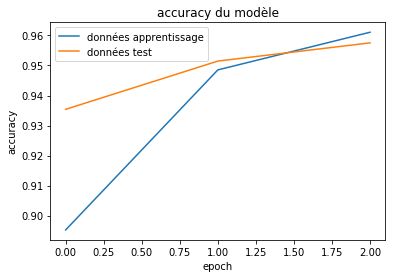

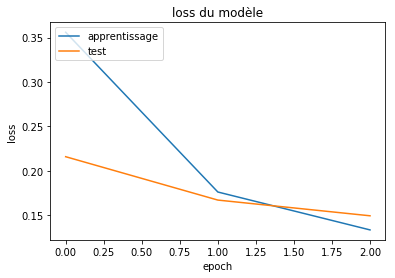

In [16]:
affiche_evolution_apprentissage(h)

### Callback
Permet de programmer la sauvegarde des modèles à chaque itération, l'adaptation du pas d'apprentissage (learning rate), une procédure de early stopping, etc

Voir <https://keras.io/callbacks/> pour les détails

In [19]:
# Early Stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, verbose=1, mode='auto')

# Adaptation du pas d'apprentissage
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', 
                       min_delta=0.0001, cooldown=0, min_lr=0)

h_es_lr = model.fit(X_train, y_train,
                    epochs=2,
                    batch_size=16,
                    verbose =1,
                    validation_split=0.33,
                    callbacks=[es, lr])

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 6s 147us/step - loss: 0.1108 - acc: 0.9682 - val_loss: 0.1369 - val_acc: 0.9622
Epoch 2/2
40199/40199 [==============================] - 7s 165us/step - loss: 0.0947 - acc: 0.9727 - val_loss: 0.1350 - val_acc: 0.9625


#### Tensorboard
Si votre backend est tensorflow, vous pouvez utiliser le tensorboard

Installer tensorboard : il est possible qu'il ait été installé en même temps que tensorflow. Dans le cas contraire, essayer : *pip install tensorboard*

Lancer le tensorboard en linux (pas faisable directement dans un notebook) :
 - dans un terminal, créer un répertoire logs *mkdir logs* puis lancer *tensorboard --logdir='./logs' &*
 - ou : *python3 -m tensorboard.main --logdir='./logs' &*

NB : Il est aussi possible de gérer le board directement dans le notebook, au prix de quelques installations : <https://github.com/lspvic/jupyter_tensorboard>

On peut maintenant dire à Keras de l'utiliser :

In [23]:
from keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, 
            write_graph=True, write_grads=False, write_images=False, 
            embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

Le board est visible en local à l'URL <http://0.0.0.0:6006/>

Pour qu'il ait des données à visualiser, il faut réaliser un apprentissage : 

In [24]:
h_tb = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=16,
                    verbose =1,
                    validation_split=0.33,
                    callbacks=[tb])

Train on 40199 samples, validate on 19801 samples
Epoch 1/3
40199/40199 [==============================] - 6s 157us/step - loss: 0.0602 - acc: 0.9834 - val_loss: 0.1242 - val_acc: 0.9664
Epoch 2/3
40199/40199 [==============================] - 6s 140us/step - loss: 0.0542 - acc: 0.9851 - val_loss: 0.1319 - val_acc: 0.9641
Epoch 3/3
40199/40199 [==============================] - 7s 176us/step - loss: 0.0497 - acc: 0.9865 - val_loss: 0.1284 - val_acc: 0.9668


## Sauver et récupérer des models

In [27]:
from keras.models import load_model

# Eventuellement, installation d'un module nécessaire :
#!pip3 install h5py

score = model.evaluate(X_test, y_test, batch_size=16)
print ("Initialement : ", score)

# Sauver le model 
model.save('mon_modele.h5')  # crée un fichier HDF5del model  

# supprime le modèle
del model

# Récupérer le modèle   
model = load_model('mon_modele.h5')

score = model.evaluate(X_test, y_test, batch_size=16)
print ("Après suppression-récupération : ", score)
print(model)

10000/10000 [==============================] - 1s 54us/step
Initialement :  [0.1127415941866464, 0.9696]
10000/10000 [==============================] - 0s 41us/step
Après suppression-récupération :  [0.1127415941866464, 0.9696]


## Utiliser Keras dans un code SciKit-learn (cross-validation / Grid search)

Dans Scikit-Learn, il y a une classe *KerasClassifier* qu'il peut-être utile de savoir utiliser :

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model_Mnist(optimizer='rmsprop', input_datadim = 784, init='glorot_uniform', nb_hid1= 20, do_rate= 0.5 ):
    # fonction créant un modèle pour MNIST
    """
    #Jusqu'à présent :
    m = Sequential()
    m.add(Dense(nb_hid1, input_dim=input_datadim, activation='relu'))
    m.add(Dropout(do_rate))
    m.add(Dense(64, activation='relu'))
    m.add(Dropout(do_rate))
    m.add(Dense(10, activation='softmax'))
    """
    # De façon équivalente :
    entree= Input(shape=(784,))
    cachee_1= Dense(64, activation='relu')(entree)
    cachee_2 = Dense(64, activation='relu')(cachee_1)
    sortie = Dense(10, activation="softmax")(cachee_2)
    m = Model(entree, sortie)
    
    m.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    m.summary()
    return m

model = KerasClassifier(build_fn=create_model_Mnist)

# valeurs des différents paramètres
optimizers = ['adam', 'rmsprop']
init = ['glorot_uniform']
V_nb_hid1 = [100]
DO_rate=[0, 0.5]

epochs = 2

param_grid = dict(optimizer=optimizers, init=init,  nb_hid1=V_nb_hid1, do_rate= DO_rate)

print(param_grid)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, epochs = epochs, verbose=2)

# Résumé des résultats
print("-----------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("-----------------------------")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

{'optimizer': ['adam', 'rmsprop'], 'init': ['glorot_uniform'], 'nb_hid1': [100], 'do_rate': [0, 0.5]}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 - 3s - loss: 0.3286 - acc: 0.9025
Epoch 2/2
 - 2s - loss: 0.1498 - acc: 0.9559
40000/40000 [==============================] - 1s 28us/step
_________________________________________________________________
Layer (type)                 Output Shape             

Epoch 1/2
 - 3s - loss: 0.3201 - acc: 0.9072
Epoch 2/2
 - 5s - loss: 0.1454 - acc: 0.9559
40000/40000 [==============================] - 2s 53us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 - 4s - loss: 0.3363 - acc: 0.9012
Epoch 2/2
 - 3s - loss: 0.1474 - acc: 0.9562
40000/40000 [=================

### Récupération des vecteurs d'activation d'une couche
Une fois un réseau appris, on peut avoir besoin des vecteurs de sortie d'une couche cachée. Avec Keras, il suffit de créer un nouveau modèle qui ne contient que le début du réseau jusqu'à la couche dont on veut accéder aux sorties.

In [31]:
#réseau complet
entree= Input(shape=(784,))
cachee_1= Dense(64, activation='relu')(entree)
cachee_2 = Dense(64, activation='relu')(cachee_1)
sortie = Dense(10, activation="softmax")(cachee_2)
m = Model(entree, sortie)

#apprentissage
m.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
m.fit(X_train, y_train, epochs=2, batch_size=16, verbose =1, validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 10s 241us/step - loss: 0.2913 - acc: 0.9141 - val_loss: 0.1645 - val_acc: 0.9499
Epoch 2/2
40199/40199 [==============================] - 11s 264us/step - loss: 0.1348 - acc: 0.9582 - val_loss: 0.1417 - val_acc: 0.9560


In [32]:
#réseau partiel
m2 = Model(entree,cachee_1)

#On aurait aussi pu faire :
# m2 = Sequential()
# m2.add(Dense(64,input_dim=784, activation='relu', weights=m.layers[0].get_weights()))

#récupération d'une matrice d'activation :
#chaque ligne est le vecteur de sortie de la dernière couche de m2 pour la donnée correspondante
activite = m2.predict(X_test)
print(activite.shape)

(10000, 64)


# A faire
Choisissez l'une de ces possibilités et réalisez la avec panache et déterminisation !

## Possibilité 1 : utiliser un réseau pour obtenir une autre représentation des données
- Apprendre un auto-encoder pour transformer les données 
- Utiliser un classifieur standard (SVM, k-ppv, etc.) sur les données transformées

Tutoriel auto-encoder en Keras : https://blog.keras.io/building-autoencoders-in-keras.html

## Possibilité 2 : Augmenter le nombre de données
- en bruitant les données
- en faisant de petites modifications des données
- d'autres idées par ici : http://leon.bottou.org/projects/infimnist
Puis réapprenez le réseau.

## Possibilité 3 : Inverser les données et les classes
L'idée ici est d'apprendre un réseau de neurones qui à partir d'un chiffre donné en entrée génère une image 28x28 de ce chiffre en manuscrit. Le nombre d'itérations nécessaires sera forcément plus élevé.

## Possibilité 4 : Fashion-MNIST
Apprendre un réseau de neuronnes réalisant la classification 10 classes sur les données de l'entreprise de fringues Zalando : https://github.com/zalandoresearch/fashion-mnist 

## Possibilité 5 : Autre architecture de réseau
L'architecture que nous avons utilisé est trop simple : 3 couches denses et c'est tout. L'idée ici est de prendre un résau plus complexe, avec des couches de convolution, du pooling, du dropout. L'utilisation de la partie fonctionnelle de Keras semble obligatoire (https://keras.io/getting-started/functional-api-guide/)